In [170]:
#import relevant packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
import tensorflow
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet # imports WordNet
from nltk import pos_tag # nltk's native part of speech tagging
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import string
import itertools
from collections import Counter
import re
from sklearn.naive_bayes import MultinomialNB

from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D, Flatten
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
import tensorflow
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [171]:
spotify_df = pd.read_csv('data/spotify_songs.csv')
genius_df = pd.read_csv('data/song_lyric.csv')
genius_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2969 non-null   object
 1   Artist_Name  2969 non-null   object
 2   Lyrics       2969 non-null   object
dtypes: object(3)
memory usage: 69.7+ KB


In [172]:
genius_df.head()

,Track_Name,Artist_Name,Lyrics
0,First Person Shooter (feat. J. Cole),Drake,245 ContributorsTranslationsEspañolDeutschPort...
1,SAY MY GRACE (feat. Travis Scott),Offset,2 ContributorsNew Music Friday 10/13/23 Lyrics...
2,HVN ON EARTH (with Kodak Black),Lil Tecca,1 ContributorNew Music Friday 08/18/23 LyricsD...
3,I KNOW ?,Travis Scott,144 ContributorsTranslationsEspañolРусскийPort...
4,IDGAF (feat. Yeat),Drake,12 ContributorsTranslationsEnglishPortuguêsEsp...


In [173]:
spotify_df.head()

,Artist Name,Track Name,Album Name,Artist URI,Album URI,Genre
0,Drake,First Person Shooter (feat. J. Cole),For All The Dogs,spotify:artist:3TVXtAsR1Inumwj472S9r4,spotify:album:4czdORdCWP9umpbhFXK2fW,Hip-Hop
1,Offset,SAY MY GRACE (feat. Travis Scott),SET IT OFF,spotify:artist:4DdkRBBYG6Yk9Ka8tdJ9BW,spotify:album:1D1hLipjrdB6pnxurMtC3E,Hip-Hop
2,Lil Tecca,HVN ON EARTH (with Kodak Black),HVN ON EARTH,spotify:artist:4Ga1P7PMIsmqEZqhYZQgDo,spotify:album:5bHwBaNZKESVBhqCvs4Ify,Hip-Hop
3,Travis Scott,I KNOW ?,UTOPIA,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,spotify:album:18NOKLkZETa4sWwLMIm0UZ,Hip-Hop
4,Drake,IDGAF (feat. Yeat),For All The Dogs,spotify:artist:3TVXtAsR1Inumwj472S9r4,spotify:album:4czdORdCWP9umpbhFXK2fW,Hip-Hop


In [174]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist Name  3199 non-null   object
 1   Track Name   3199 non-null   object
 2   Album Name   3199 non-null   object
 3   Artist URI   3199 non-null   object
 4   Album URI    3199 non-null   object
 5   Genre        3199 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB


In [175]:
#rename column names for merging
spotify_df.rename(columns={'Artist Name': 'Artist_Name', 'Track Name': 'Track_Name'}, inplace=True)
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist_Name  3199 non-null   object
 1   Track_Name   3199 non-null   object
 2   Album Name   3199 non-null   object
 3   Artist URI   3199 non-null   object
 4   Album URI    3199 non-null   object
 5   Genre        3199 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB


In [176]:
#merge to get the genre combined with the lyrics
lyrics_df = genius_df.merge(spotify_df, on=['Artist_Name', 'Track_Name'], how='left')
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2969 non-null   object
 1   Artist_Name  2969 non-null   object
 2   Lyrics       2969 non-null   object
 3   Album Name   2969 non-null   object
 4   Artist URI   2969 non-null   object
 5   Album URI    2969 non-null   object
 6   Genre        2969 non-null   object
dtypes: object(7)
memory usage: 162.5+ KB


In [177]:
lyrics_df.drop(columns=['Album Name', 'Artist URI', 'Album URI'], axis=1, inplace=True)
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2969 non-null   object
 1   Artist_Name  2969 non-null   object
 2   Lyrics       2969 non-null   object
 3   Genre        2969 non-null   object
dtypes: object(4)
memory usage: 92.9+ KB


In [178]:
lyrics_df.dropna(subset='Genre', inplace=True)
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2969 non-null   object
 1   Artist_Name  2969 non-null   object
 2   Lyrics       2969 non-null   object
 3   Genre        2969 non-null   object
dtypes: object(4)
memory usage: 92.9+ KB


In [179]:
#view example text
lyrics_df['Lyrics'][240]

'151 ContributorsTranslationsРусскийIf I Ruled the World (Imagine That) Lyrics[Produced by Rashad Smith & Trackmasters]\n\n[Intro: Nas]\nLife\nI wonder.. will it take me under?\nI don\'t know\n[Verse 1: Nas]\nImagine smoking weed in the street without cops harassing\nImagine going to court with no trial\nLifestyle, cruising blue Bahama waters\nNo welfare supporters, more conscious of the way we raise our daughters\nDays are shorter, nights are colder\nFeeling like life is over, these snakes strike like a cobra\nThe world\'s hot, my son got knocked\nEvidently, it\'s elementary, they want us all gone eventually\nTrooping outta state for a plate of knowledge\nIf coke was cooked without the garbage, we\'d all have the top dollars\nImagine everybody flashing fashion, designer clothes\nLacing ya clique up with diamond Roles\nYour people holding dough, no parole, no rubbers\nGo in raw, imagine law with no undercovers\nJust some thoughts for the mind\nI take a glimpse into time\nWatch the blim

In [180]:
lyrics_df['Genre'].value_counts()

Genre
country    1019
Hip-Hop     977
punk        973
Name: count, dtype: int64

In [181]:
lyrics_df['Genre'] = lyrics_df['Genre'].str.replace('Hip-Hop', 'hip-hop')
lyrics_df['Genre'].value_counts()

Genre
country    1019
hip-hop     977
punk        973
Name: count, dtype: int64

In [182]:
lyrics_df = lyrics_df[lyrics_df['Genre'] != 'pop']
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2969 non-null   object
 1   Artist_Name  2969 non-null   object
 2   Lyrics       2969 non-null   object
 3   Genre        2969 non-null   object
dtypes: object(4)
memory usage: 92.9+ KB


In [183]:
#define stopwords
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['\n', "''", '``', '—', '2018', "n't", '’', "'m", 'feat', '”', '“', "'re", 'said', 'got', 'tony', "'s", "'ll", '--', 'na',
                  'ai', 'na', "'ve", 'ca']
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [184]:
#remove inappropriate words
stopwords_list += ['fuck', 'fucking', 'fucks', 'nigga', 'niggas', 'bitch', 'bitches', 'shit']

In [185]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [186]:
#removing songs that repeat the same word more than 100 times

# Define the threshold
threshold = 100

# Define a list of stopwords
stopwords_list = stopwords_list

# Function to check if any word exceeds the threshold in lyrics (case-insensitive)
def exceeds_threshold(lyrics):
    word_counts = {}
    words = re.findall(r'\b\w+\b', lyrics.lower())  # Convert to lowercase for case-insensitivity
    for word in words:
        if word not in stopwords_list:
            word_counts[word] = word_counts.get(word, 0) + 1
            if word_counts[word] > threshold:
                return True
    return False

# Identify songs to remove
songs_to_remove = []
for index, row in lyrics_df.iterrows():
    lyrics = row['Lyrics']
    if exceeds_threshold(lyrics):
        songs_to_remove.append(index)

# Remove the songs
lyrics_df_2 = lyrics_df.drop(songs_to_remove)

lyrics_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, 0 to 2968
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2880 non-null   object
 1   Artist_Name  2880 non-null   object
 2   Lyrics       2880 non-null   object
 3   Genre        2880 non-null   object
dtypes: object(4)
memory usage: 112.5+ KB


In [187]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2969 non-null   object
 1   Artist_Name  2969 non-null   object
 2   Lyrics       2969 non-null   object
 3   Genre        2969 non-null   object
dtypes: object(4)
memory usage: 92.9+ KB


In [188]:
lyrics_df_2.reset_index(inplace=True, drop=True)
lyrics_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   2880 non-null   object
 1   Artist_Name  2880 non-null   object
 2   Lyrics       2880 non-null   object
 3   Genre        2880 non-null   object
dtypes: object(4)
memory usage: 90.1+ KB


In [189]:
lyrics_df_2.head()

,Track_Name,Artist_Name,Lyrics,Genre
0,First Person Shooter (feat. J. Cole),Drake,245 ContributorsTranslationsEspañolDeutschPort...,hip-hop
1,SAY MY GRACE (feat. Travis Scott),Offset,2 ContributorsNew Music Friday 10/13/23 Lyrics...,hip-hop
2,HVN ON EARTH (with Kodak Black),Lil Tecca,1 ContributorNew Music Friday 08/18/23 LyricsD...,hip-hop
3,I KNOW ?,Travis Scott,144 ContributorsTranslationsEspañolРусскийPort...,hip-hop
4,IDGAF (feat. Yeat),Drake,12 ContributorsTranslationsEnglishPortuguêsEsp...,hip-hop


In [190]:
genre_splits = lyrics_df_2['Genre'].value_counts(normalize=True)

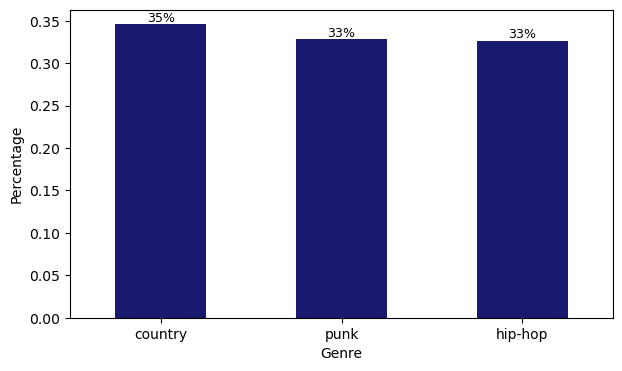

In [191]:
ax = genre_splits.plot(kind='bar', figsize=(7, 4), color='midnightblue')

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Percentage')

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)  # 0 degrees rotation

# Add labels above the bars
for i, v in enumerate(genre_splits):
    ax.text(i, v, f'{v:.0%}', ha='center', va='bottom', fontsize=9)

# Show the chart
plt.show()

## Corpus Statistics

In [192]:
#Separate out text for additional EDA and lowercase
lyrics = lyrics_df_2['Lyrics'].str.lower()

#remove any words prior to and including 'lyrics'. Each set of lyrics starts with the number of contributors and name of song.
lyrics = lyrics.str.replace(r'^.*?lyrics', '', regex=True)

#remove any words in brackets. in the lyrics, brackets are use to label verse, chorus, intro, etc, or used for other notes.
lyrics = lyrics.str.replace(r'\[.*?\]', '', regex=True)

#remove 'embed' and any numbers in front of embed. this is listed at the end of each set of lyrics
lyrics = lyrics.str.replace(r'\d+embed', '', regex=True)

lyrics[300]

"1. yeat - shmunk (feat. youngboy never broke again)\n2. ken carson - i need u\n3. destory lonely - neverever\n4. een triplin - walked in\n5. mvw, tiacorina & lil cherry - tru\u205ftru\n6.\u205fmidwxst\u205f& denzel curry\u205f- tally\n7. lil\u205fuzi vert, sped up nightcore & arizonatears - watch this\n(arizonatears pluggnb remix)\n8. junglt bobby & ceo@business.net - friday\n9. lucidbeatz - let u go\n10. artan - she's a 10 but... (remix) (feat. yung gravy)\n11. cochise - perm\n12. superstar pride - painting pictures\n13. pinkpantheress & ice spice - boy's a liar pt. 2\n14. ndo dee - my way\n15. thxsomuch - spit in my face!\n16. mimofr - ascend.mp3\n17. lil pump & smokepurpp - tesla\n18. lambo4oe - self esteem (feat. nle choppa)\n19. chris travis - diamonds\n20. jev. - where's the confetti?\n21. icе spice - in ha mood\n22. luci4 - dead n gone\n23. lil uzi vеrt - just wanna rock\n24. lil yachty - pretty\n25. yn jay - perc & sex\n26. yeat - fukit\n27. i can't\n28. key glock - ambition f

In [193]:
#instantiate tokenizer to keep only three letter words. tokenize lyrics and build vocab list
pattern = r"(?u)\w{3,}"
tokenizer = RegexpTokenizer(pattern)

lyrics_tokenized = lyrics.apply(lambda x: tokenizer.tokenize(x)).sum()
lyrics_tokenized

['pew',
 'pew',
 'pew',
 'first',
 'person',
 'shooter',
 'mode',
 'turnin',
 'your',
 'song',
 'funeral',
 'them',
 'niggas',
 'that',
 'say',
 'they',
 'wan',
 'off',
 'you',
 'better',
 'talkin',
 'bout',
 'workin',
 'cubicles',
 'yeah',
 'them',
 'boys',
 'had',
 'locked',
 'but',
 'knew',
 'the',
 'code',
 'lot',
 'niggas',
 'debatin',
 'numeral',
 'not',
 'the',
 'three',
 'not',
 'the',
 'two',
 'the',
 'yeah',
 'numero',
 'and',
 'drizzy',
 'this',
 'shit',
 'like',
 'the',
 'super',
 'bowl',
 'man',
 'this',
 'shit',
 'damn',
 'near',
 'big',
 'the',
 'big',
 'the',
 'what',
 'big',
 'the',
 'what',
 'big',
 'the',
 'what',
 'big',
 'the',
 'super',
 'bowl',
 'but',
 'the',
 'difference',
 'just',
 'two',
 'guys',
 'playin',
 'shit',
 'that',
 'they',
 'did',
 'the',
 'studio',
 'niggas',
 'usually',
 'send',
 'they',
 'verses',
 'back',
 'and',
 'they',
 'terrible',
 'just',
 'like',
 'two',
 'year',
 'old',
 'love',
 'dinner',
 'with',
 'some',
 'fine',
 'women',
 'when',
 '

In [194]:
#remove stop words
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [195]:
#remove stop words
lyrics_tokenized_stopwords_removed = [word for word in lyrics_tokenized if word not in stopwords_list]
lyrics_tokenized_stopwords_removed

['pew',
 'pew',
 'pew',
 'first',
 'person',
 'shooter',
 'mode',
 'turnin',
 'song',
 'funeral',
 'say',
 'wan',
 'better',
 'talkin',
 'bout',
 'workin',
 'cubicles',
 'yeah',
 'boys',
 'locked',
 'knew',
 'code',
 'lot',
 'debatin',
 'numeral',
 'three',
 'two',
 'yeah',
 'numero',
 'drizzy',
 'like',
 'super',
 'bowl',
 'man',
 'damn',
 'near',
 'big',
 'big',
 'big',
 'big',
 'big',
 'super',
 'bowl',
 'difference',
 'two',
 'guys',
 'playin',
 'studio',
 'usually',
 'send',
 'verses',
 'back',
 'terrible',
 'like',
 'two',
 'year',
 'old',
 'love',
 'dinner',
 'fine',
 'women',
 'start',
 'debatin',
 'like',
 'head',
 'say',
 'really',
 'rootin',
 'like',
 'kid',
 'act',
 'bad',
 'january',
 'november',
 'cole',
 'big',
 'big',
 'big',
 'ayy',
 'big',
 'super',
 'bowl',
 'might',
 'also',
 'like',
 'thirsty',
 'put',
 'beef',
 'dissectin',
 'words',
 'start',
 'lookin',
 'deep',
 'look',
 'tweets',
 'start',
 'suckin',
 'teeth',
 'lettin',
 'rock',
 'cause',
 'love',
 'mystique',

In [196]:
print(len(lyrics_tokenized_stopwords_removed))
print(len(set(lyrics_tokenized_stopwords_removed)))

760567
56051


In [197]:
#observe frequency of vocab across all lyrics
vocab_freq_dist = nltk.FreqDist(lyrics_tokenized_stopwords_removed)
vocab_freq_dist.most_common(30)


[('like', 11609),
 ('yeah', 6197),
 ('know', 6052),
 ('get', 5412),
 ('love', 4623),
 ('one', 4487),
 ('back', 3636),
 ('see', 3547),
 ('might', 3491),
 ('time', 3232),
 ('let', 3195),
 ('never', 3088),
 ('cause', 3078),
 ('also', 2818),
 ('make', 2792),
 ('wanna', 2752),
 ('baby', 2624),
 ('way', 2589),
 ('say', 2531),
 ('take', 2501),
 ('want', 2368),
 ('right', 2338),
 ('come', 2326),
 ('man', 2251),
 ('good', 2196),
 ('lil', 2078),
 ('little', 1981),
 ('girl', 1959),
 ('could', 1914),
 ('still', 1911)]

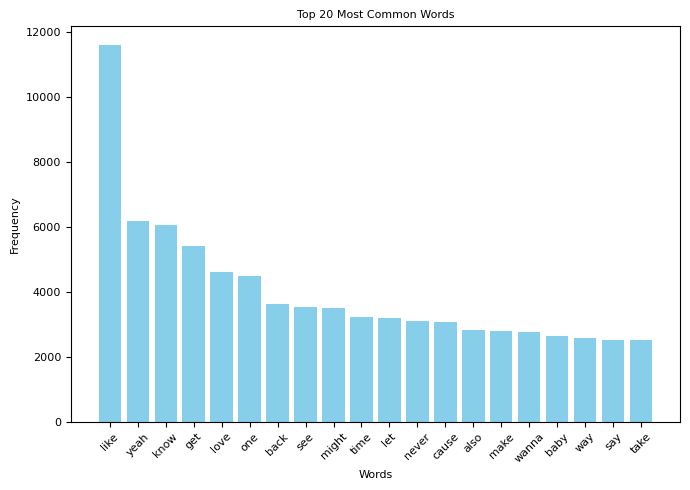

In [198]:
top_words = vocab_freq_dist.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(7, 5))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45, fontsize=8) 
plt.yticks(fontsize=8)
plt.xlabel('Words', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.title('Top 20 Most Common Words', fontsize=8)

plt.tight_layout() 
plt.show()

## Corpus Statistics by Genre

In [199]:
#Create function for preprocessing:
def preprocess_lyrics(lyrics, stopwords_list=None):
    lyrics = lyrics['Lyrics']
    lyrics = lyrics.str.lower()
    
    lyrics = lyrics.str.replace(r'^.*?lyrics', '', regex=True)
    
    lyrics = lyrics.str.replace(r'\[.*?\]', '', regex=True)
    
    lyrics = lyrics.str.replace(r'\d+embed', '', regex=True)
    
    # Tokenize and concatenate
    lyrics_tokenized = lyrics.apply(lambda x: tokenizer.tokenize(x))
    lyrics_tokenized = list(itertools.chain(*lyrics_tokenized))
    
    # Remove stopwords
    if stopwords_list:
        lyrics_tokenized_stopwords_removed = [word for word in lyrics_tokenized if word not in stopwords_list]
    else:
        lyrics_tokenized_stopwords_removed = lyrics_tokenized

    #Lemmatize 
    lemmatizer = WordNetLemmatizer()
    lyrics_final = [lemmatizer.lemmatize(word) for word in lyrics_tokenized_stopwords_removed]

    return lyrics_final


In [200]:
hiphop_df = lyrics_df_2[lyrics_df_2['Genre'] == 'hip-hop']
punk_df = lyrics_df_2[lyrics_df_2['Genre'] == 'punk']
country_df = lyrics_df_2[lyrics_df_2['Genre'] == 'country']


In [201]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 939 to 1934
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   996 non-null    object
 1   Artist_Name  996 non-null    object
 2   Lyrics       996 non-null    object
 3   Genre        996 non-null    object
dtypes: object(4)
memory usage: 38.9+ KB


In [202]:
lyrics_df_2['Genre'].value_counts()

Genre
country    996
punk       945
hip-hop    939
Name: count, dtype: int64

In [203]:
hiphop_preprocessed = preprocess_lyrics(hiphop_df, stopwords_list)
punk_preprocessed = preprocess_lyrics(punk_df, stopwords_list)
country_preprocessed = preprocess_lyrics(country_df, stopwords_list)

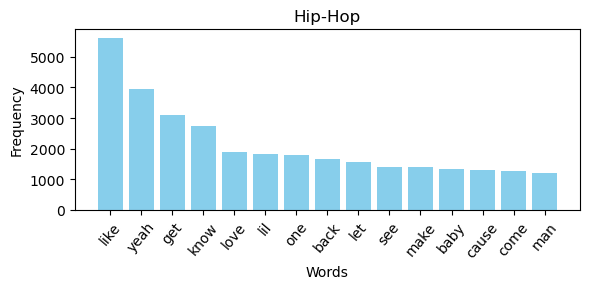

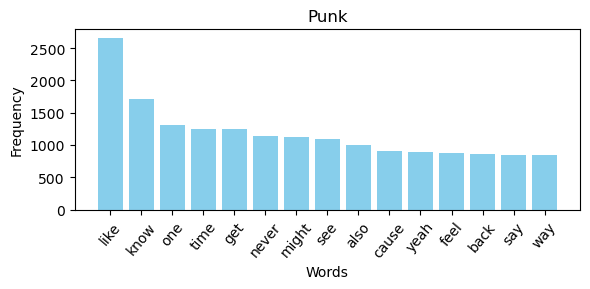

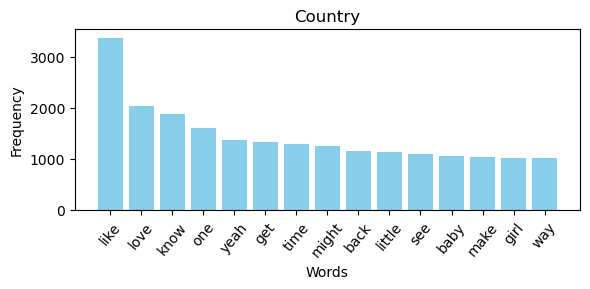

In [204]:
lyrics_by_genre = {'Hip-Hop': hiphop_preprocessed, 'Punk': punk_preprocessed, 'Country': country_preprocessed}

for genre, words in lyrics_by_genre.items():
    freq_dist = nltk.FreqDist(words)
    top_words = freq_dist.most_common(15)

    words, frequencies = zip(*top_words)

    plt.figure(figsize=(6, 3))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(f'{genre}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=50)

    plt.tight_layout()
    plt.show()

## Preprocessing

In [205]:
# First train-test split. keep genre split. set random state for reproducibility.
labels = lyrics_df_2['Genre']
text = lyrics_df_2['Lyrics']

X_train, X_test, y_train, y_test = train_test_split(text, labels, stratify=labels, random_state=117, test_size=0.2)

In [206]:
def preprocess_lyrics_one_doc(lyrics, stopwords_list=None):
    #lower case all words
    lyrics = lyrics.lower()
 
    #manual changes given patterns of each text. remove intro para, remove bracketted words which are not lyrics
    #remove outro para that ends in 'embed'
    patterns = [r'^.*?lyrics', r'\[.*?\]', r'\d+embed']
    for pattern in patterns:
        lyrics = re.sub(pattern, '', lyrics)
    
    # Tokenize
    lyrics_tokenized = tokenizer.tokenize(lyrics)
  
    # Remove stopwords
    lyrics_tokenized_stopwords_removed = [word for word in lyrics_tokenized if word not in stopwords_list]
 
    #Lemmatize 
    lemmatizer = WordNetLemmatizer()
    lyrics_preprocessed = [lemmatizer.lemmatize(word) for word in lyrics_tokenized_stopwords_removed]

    return lyrics_preprocessed

In [207]:
#preprocess X-train.
X_train_preprocessed = X_train.apply(lambda x: preprocess_lyrics_one_doc(x, stopwords_list))
X_train_preprocessed = X_train_preprocessed.str.join(" ")
X_train_preprocessed

1930    smile make worst day feel like birthday laugh ...
989     damn found new man found new friend new black ...
804     crip lat big snoop dogg leave name number moth...
1334    mama callin news tell daddy blow fuse worry do...
2533    name line last request pull car find rest sayi...
                              ...                        
2651    hate hate life desperate people learn despise ...
2005    forgiving beginning know never let good one ho...
875     yea broken pain told ignore one key one opened...
1924    girl never seen town need somebody show around...
2138    taking seven year holy ghost left alone test a...
Name: Lyrics, Length: 2304, dtype: object

In [208]:
#preprocess X-test
X_test_preprocessed = X_test.apply(lambda x: preprocess_lyrics_one_doc(x, stopwords_list))
X_test_preprocessed = X_test_preprocessed.str.join(" ")
X_test_preprocessed

1361    jack make good whiskey yeah red dirt make good...
1668    loving wrong wanna right right mean without ra...
176     put sucker want flow show grab mic flip script...
1360    love first cast water glass line start run fir...
2360    come come hurry harry come come come hurry har...
                              ...                        
1975    retrospect best buy camera record stuff though...
1221    piece land countryside lay back smell sun warm...
2266    juice wrld feline polo trippie redd boogie wit...
227     yeah yeah ayo black time word word time man ti...
1512    concrete sky blue finally leaving austin wish ...
Name: Lyrics, Length: 576, dtype: object

In [209]:
#average song word count
song_len = []
for song in X_test_preprocessed:
    song_len.append(len(song))
round(np.mean(song_len), 2)


1727.17

Will be using both count vectorized and tfid vectorized data

In [210]:
# Instantiate Vectorizers, only using unigrams.
count_vec = CountVectorizer() 
tfidf_vec = TfidfVectorizer()

In [211]:
#fit to X_train. tranform X_train and X_test
X_train_count = count_vec.fit_transform(X_train_preprocessed)
X_test_count = count_vec.transform(X_test_preprocessed) 
X_train_tfidf = tfidf_vec.fit_transform(X_train_preprocessed) 
X_test_tfidf = tfidf_vec.transform(X_test_preprocessed)


## Modeling 

1. Random Forest
2. MultinomialNB
3. Logistic Regression
4. Neural Networks

### 1. Random Forest Classifier

In [212]:
#Instantiate Random Forest Models
rf_count = RandomForestClassifier(random_state=117, n_jobs=-1, class_weight='balanced')
rf_tfidf = RandomForestClassifier(random_state=117, n_jobs=-1, class_weight='balanced')
rf_count.fit(X_train_count, y_train)
rf_tfidf.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=117)

In [213]:
#cross validate random forest count vectorized model
rf_count_cv = cross_validate(estimator=rf_count,
                           X=X_train_count,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('Count Vectorized Train Score:', rf_count_cv['train_accuracy'].mean())
print('Count Vectorized Test Score:', rf_count_cv['test_accuracy'].mean())

Count Vectorized Train Score: 0.9962021979160168
Count Vectorized Test Score: 0.8402857681788174


In [214]:
#cross validate random forest tfidf vectorized model
rf_tfidf_cv = cross_validate(estimator=rf_tfidf,
                           X=X_train_tfidf,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('TFIDF Vectorized Train Score:', rf_count_cv['train_accuracy'].mean())
print('TFIDF Vectorized Test Score:', rf_count_cv['test_accuracy'].mean())

TFIDF Vectorized Train Score: 0.9962021979160168
TFIDF Vectorized Test Score: 0.8402857681788174


Seeing high train scores but low test scores. This suggests there is some overfitting. We will address this with hyperparameter
tuning.

#### Tune Random Forest - Count Vectorized Model

In [215]:
rf_count_gs = RandomForestClassifier(random_state=117, n_jobs=-1, class_weight='balanced')

params_count = {
    'n_estimators': [50, 100, 500],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3, 4],
    'max_depth': [75, 100, 150],
    'max_features': ['sqrt'],
    'bootstrap': [True, False],
    'criterion': ['entropy', 'gini']}

rf_count_gs_cv = GridSearchCV(estimator=rf_count_gs, param_grid=params_count,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

rf_count_gs_cv.fit(X_train_count, y_train)

#print('Count Vectorized Train Score:', rf_count_gs_cv['train_accuracy'].mean())
#print('Count Vectorized Test Score:', rf_count_gs_cv['test_accuracy'].mean())
rf_count_gs_cv.best_params_                             

Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [216]:
rf_count_best_model = rf_count_gs_cv.best_estimator_
rf_count_best_train_score = rf_count_gs_cv.cv_results_['mean_train_score'][rf_count_gs_cv.best_index_]
rf_count_best_test_score = rf_count_gs_cv.best_score_

print('RF Count Best Model:', rf_count_best_model)
print("RF Count Best Model Train Accuracy Score:", rf_count_best_train_score)
print("RF Count Best Model Test Accuracy Score:", rf_count_best_test_score)

RF Count Best Model: RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=100, min_samples_leaf=3,
                       n_estimators=500, n_jobs=-1, random_state=117)
RF Count Best Model Train Accuracy Score: 0.9722222222222222
RF Count Best Model Test Accuracy Score: 0.8567708333333334


Still experiencing significant overfitting. Let's try the same process on the TDIDF vectorized data

#### Tune Random Forest - TFIDF Vectorized Model

In [217]:
rf_tfidf_gs = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

params_tfidf = {
    'n_estimators': [50, 100, 500],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3, 4],
    'max_depth': [75, 100, 150],
    'max_features': ['sqrt'],
    'bootstrap': [True, False],
    'criterion': ['entropy', 'gini']}

rf_tfidf_gs_cv = GridSearchCV(estimator=rf_tfidf_gs, param_grid=params_tfidf,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

rf_tfidf_gs_cv.fit(X_train_tfidf, y_train)

rf_tfidf_gs_cv.best_params_   

Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 75,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [218]:
rf_tfidf_best_model = rf_tfidf_gs_cv.best_estimator_
rf_tfidf_best_train_score = rf_tfidf_gs_cv.cv_results_['mean_train_score'][rf_tfidf_gs_cv.best_index_]
rf_tfidf_best_test_score = rf_tfidf_gs_cv.best_score_

print('RF TFIDF Best Model:', rf_tfidf_best_model)
print("RF TFIDF Best Model Train Accuracy Score:", rf_tfidf_best_train_score)
print("RF TFIDF Best Model Test Accuracy Score:", rf_tfidf_best_test_score)

RF TFIDF Best Model: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=75,
                       min_samples_leaf=2, n_estimators=500, n_jobs=-1,
                       random_state=42)
RF TFIDF Best Model Train Accuracy Score: 0.9928385416666666
RF TFIDF Best Model Test Accuracy Score: 0.8528645833333334


This version performed a bit better than the count vectorized tuned random forest model, but there is still significant 
overfitting

### 2. Multinomial NB

In [219]:
mnb_count = MultinomialNB()
mnb_tfidf = MultinomialNB()
mnb_count.fit(X_train_count, y_train)
mnb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [220]:
#cross validate random forest count vectorized model
mnb_count_cv = cross_validate(estimator=mnb_count,
                           X=X_train_count,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('Count Vectorized Train Score:', mnb_count_cv['train_accuracy'].mean())
print('Count Vectorized Test Score:', mnb_count_cv['test_accuracy'].mean())

Count Vectorized Train Score: 0.9510639424780166
Count Vectorized Test Score: 0.8554701499575593


In [221]:
mnb_tfidf_cv = cross_validate(estimator=mnb_tfidf,
                           X=X_train_tfidf,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('TFIDF Vectorized Train Score:', mnb_count_cv['train_accuracy'].mean())
print('TFIDF Vectorized Test Score:', mnb_count_cv['test_accuracy'].mean())

TFIDF Vectorized Train Score: 0.9510639424780166
TFIDF Vectorized Test Score: 0.8554701499575593


#### Tune Multinomial NB - Count Vectorized Model

In [222]:
mnb_count_gs = MultinomialNB()

params_count = {
    'alpha': [0, 0.5, 1],
    'force_alpha': [True, False],
    'fit_prior': [True, False]}

mnb_count_gs_cv = GridSearchCV(estimator=mnb_count_gs, param_grid=params_count,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

mnb_count_gs_cv.fit(X_train_count, y_train)

#print('Count Vectorized Train Score:', rf_count_gs_cv['train_accuracy'].mean())
#print('Count Vectorized Test Score:', rf_count_gs_cv['test_accuracy'].mean())
mnb_count_gs_cv.best_params_     

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will 

{'alpha': 0.5, 'fit_prior': False, 'force_alpha': True}

In [223]:
mnb_count_best_model = mnb_count_gs_cv.best_estimator_
mnb_count_best_train_score = mnb_count_gs_cv.cv_results_['mean_train_score'][mnb_count_gs_cv.best_index_]
mnb_count_best_test_score = mnb_count_gs_cv.best_score_

print('MNB Count Best Model:', mnb_count_best_model)
print("MNB Count Best Model Train Accuracy Score:", mnb_count_best_train_score)
print("MNB Count Best Model Test Accuracy Score:", mnb_count_best_test_score)

MNB Count Best Model: MultinomialNB(alpha=0.5, fit_prior=False, force_alpha=True)
MNB Count Best Model Train Accuracy Score: 0.9639756944444443
MNB Count Best Model Test Accuracy Score: 0.8407118055555555


Big time overfitting.

#### Tune Multinomial NB - TFIDF Vectorized Model

In [224]:
mnb_tfidf_gs = MultinomialNB()

params_tfidf = {
    'alpha': [0, 0.5, 1],
    'force_alpha': [True, False],
    'fit_prior': [True, False]}

mnb_tfidf_gs_cv = GridSearchCV(estimator=mnb_tfidf_gs, param_grid=params_tfidf,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

mnb_tfidf_gs_cv.fit(X_train_tfidf, y_train)

mnb_tfidf_gs_cv.best_params_   

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will 

{'alpha': 0, 'fit_prior': True, 'force_alpha': False}

In [225]:
mnb_tfidf_best_model = mnb_tfidf_gs_cv.best_estimator_
mnb_tfidf_best_train_score = mnb_tfidf_gs_cv.cv_results_['mean_train_score'][mnb_tfidf_gs_cv.best_index_]
mnb_tfidf_best_test_score = mnb_tfidf_gs_cv.best_score_

print('MNB TFIDF Best Model:', mnb_tfidf_best_model)
print("MNB TFIDF Best Model Train Accuracy Score:", mnb_tfidf_best_train_score)
print("MNB TFIDF Best Model Test Accuracy Score:", mnb_tfidf_best_test_score)

MNB TFIDF Best Model: MultinomialNB(alpha=0, force_alpha=False)
MNB TFIDF Best Model Train Accuracy Score: 0.9937065972222222
MNB TFIDF Best Model Test Accuracy Score: 0.7973090277777778


Still overfitting

## 3. Logistic Regression

In [226]:
lg_count = LogisticRegression(solver='newton-cg', random_state=117)
lg_tfidf = LogisticRegression(solver='newton-cg', random_state=117)
lg_count.fit(X_train_count, y_train)
lg_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=117, solver='newton-cg')

In [227]:
#cross validate random forest count vectorized model
lg_count_cv = cross_validate(estimator=lg_count,
                           X=X_train_count,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('Count Vectorized Train Score:', lg_count_cv['train_accuracy'].mean())
print('Count Vectorized Test Score:', lg_count_cv['test_accuracy'].mean())

Count Vectorized Train Score: 0.9962021979160168
Count Vectorized Test Score: 0.7986079411487315


In [228]:
#cross validate random forest tfidf vectorized model
lg_tfidf_cv = cross_validate(estimator=lg_tfidf,
                           X=X_train_tfidf,
                           y=y_train,
                           cv=5,
                           scoring=['accuracy'],
                           return_train_score=True)

print('TFIDF Vectorized Train Score:', rf_count_cv['train_accuracy'].mean())
print('TFIDF Vectorized Test Score:', rf_count_cv['test_accuracy'].mean())

TFIDF Vectorized Train Score: 0.9962021979160168
TFIDF Vectorized Test Score: 0.8402857681788174


#### Logistic Regression - Count Vectorized Model

In [229]:
lg_count_gs = LogisticRegression(solver='newton-cg', random_state=117)

params_count = {
    'penalty': ['l2', 'l1', None],
    'tol': [0.0001, .001],
    'C': [.05, .1, 1],
    'max_iter': [50, 100],
    'solver': ['newton-cg', 'sag', 'saga']}
    
    

lg_count_gs_cv = GridSearchCV(estimator=lg_count_gs, param_grid=params_count,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

lg_count_gs_cv.fit(X_train_count, y_train)

lg_count_gs_cv.best_params_  

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

{'C': 0.05,
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'newton-cg',
 'tol': 0.0001}

In [230]:
lg_count_best_model = lg_count_gs_cv.best_estimator_
lg_count_best_train_score = lg_count_gs_cv.cv_results_['mean_train_score'][lg_count_gs_cv.best_index_]
lg_count_best_test_score = lg_count_gs_cv.best_score_

print('Logistic Regression Count Best Model:', lg_count_best_model)
print("Logistic Regression Count Best Model Train Accuracy Score:", lg_count_best_train_score)
print("Logistic Regression Count Best Model Test Accuracy Score:", lg_count_best_test_score)

Logistic Regression Count Best Model: LogisticRegression(C=0.05, max_iter=50, random_state=117, solver='newton-cg')
Logistic Regression Count Best Model Train Accuracy Score: 0.9956597222222223
Logistic Regression Count Best Model Test Accuracy Score: 0.7951388888888888


#### Logistic Regression - TFIDF Vectorized Model

In [231]:
lg_tfidf_gs = LogisticRegression(solver='newton-cg', random_state=117)

params_tfidf = {
    'penalty': ['l2', 'l1', None],
    'tol': [0.0001, .001],
    'C': [.05, .1, 1],
    'max_iter': [50, 100],
    'solver': ['newton-cg', 'sag', 'saga']}
    
    

lg_tfidf_gs_cv = GridSearchCV(estimator=lg_tfidf_gs, param_grid=params_tfidf,
                              cv=3, scoring='accuracy', return_train_score=True,
                              verbose=1)

lg_tfidf_gs_cv.fit(X_train_tfidf, y_train)

lg_tfidf_gs_cv.best_params_  

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio paramete

{'C': 0.05, 'max_iter': 50, 'penalty': None, 'solver': 'saga', 'tol': 0.0001}

In [232]:
lg_tfidf_best_model = lg_tfidf_gs_cv.best_estimator_
lg_tfidf_best_train_score = lg_tfidf_gs_cv.cv_results_['mean_train_score'][lg_tfidf_gs_cv.best_index_]
lg_tfidf_best_test_score = lg_tfidf_gs_cv.best_score_

print('Logistic Regression Count Best Model:', lg_tfidf_best_model)
print("Logistic Regression Count Best Model Train Accuracy Score:", lg_tfidf_best_train_score)
print("Logistic Regression Count Best Model Test Accuracy Score:", lg_tfidf_best_test_score)

Logistic Regression Count Best Model: LogisticRegression(C=0.05, max_iter=50, penalty=None, random_state=117,
                   solver='saga')
Logistic Regression Count Best Model Train Accuracy Score: 0.9963107638888888
Logistic Regression Count Best Model Test Accuracy Score: 0.8233506944444443


## 4. Neural Networks

In [233]:
tensorflow.random.set_seed(42)

In [234]:
#convert to arrays for use in neural network models
X_train_count_2 = X_train_count.toarray()
X_train_tfidf_2 = X_train_count.toarray()

In [235]:
#one-hot encode labels
le = LabelEncoder()
y_train_num = le.fit_transform(y_train)

y_test_num = le.transform(y_test)

y_train_encoded = to_categorical(y_train_num)

y_test_encoded = to_categorical(y_test_num)

print(np.shape(y_train_encoded))
print(np.shape(y_test_encoded))

(2304, 3)
(576, 3)


In [236]:
num_classes = 3
layers_activation = 'relu'
output_activation = 'softmax'

In [237]:
#declare function to create neural network model
def create_nn_model(input_shape, layers_activation, num_classes, output_activation):
    
    # build model
    model = Sequential()
    #input layer
    model.add(layers.Dropout(0.2, input_shape=input_shape))
    
    #first hidden layer
    model.add(Dense(units=10, kernel_regularizer=regularizers.l2(0.0005), activation=layers_activation))
    model.add(layers.Dropout(0.3))

    #second hidden layer
    model.add(Dense(units=10, kernel_regularizer=regularizers.l2(0.0005), activation=layers_activation))
    model.add(layers.Dropout(0.3))

    
    #output layer
    model.add(Dense(units=num_classes, activation=output_activation))
    
    # compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    # display model summary
    #display(model.summary())
    
    return model

#### Count Vectorized Neural Network Model

In [238]:
nn_count_model = create_nn_model(X_train_count_2.shape[1:], 
                                 layers_activation=layers_activation, 
                                 num_classes=num_classes,
                                 output_activation=output_activation)

nn_count_model_hist = nn_count_model.fit(X_train_count_2, y_train_encoded, validation_split= .2,
                   epochs=300,
                   batch_size=100)

Epoch 1/300
19/19 [==============================] - 1s 25ms/step - loss: 1.0763 - accuracy: 0.4411 - val_loss: 0.9633 - val_accuracy: 0.6790
Epoch 2/300
19/19 [==============================] - 0s 12ms/step - loss: 0.9291 - accuracy: 0.5556 - val_loss: 0.8069 - val_accuracy: 0.7701
Epoch 3/300
19/19 [==============================] - 0s 11ms/step - loss: 0.7941 - accuracy: 0.6625 - val_loss: 0.7165 - val_accuracy: 0.7939
Epoch 4/300
19/19 [==============================] - 0s 12ms/step - loss: 0.7216 - accuracy: 0.7103 - val_loss: 0.6886 - val_accuracy: 0.8286
Epoch 5/300
19/19 [==============================] - 0s 12ms/step - loss: 0.6608 - accuracy: 0.7564 - val_loss: 0.6548 - val_accuracy: 0.8330
Epoch 6/300
19/19 [==============================] - 0s 12ms/step - loss: 0.6055 - accuracy: 0.7786 - val_loss: 0.6294 - val_accuracy: 0.8308
Epoch 7/300
19/19 [==============================] - 0s 12ms/step - loss: 0.5424 - accuracy: 0.7965 - val_loss: 0.6109 - val_accuracy: 0.8438
Epoch 

In [239]:
nn_count_train_acc = nn_count_model_hist.history['accuracy'][-1]
nn_count_val_acc = nn_count_model_hist.history['val_accuracy'][-1]

#### TFI-DF Vectorized Neural Network Model

In [240]:
nn_tfidf_model = create_nn_model(X_train_tfidf_2.shape[1:], 
                                 layers_activation=layers_activation, 
                                 num_classes=num_classes,
                                 output_activation=output_activation)

nn_tfidf_model_hist = nn_tfidf_model.fit(X_train_tfidf_2, y_train_encoded, validation_split= .2,
                   epochs=300,
                   batch_size=100)

Epoch 1/300
19/19 [==============================] - 1s 25ms/step - loss: 1.0262 - accuracy: 0.4742 - val_loss: 0.9068 - val_accuracy: 0.6269
Epoch 2/300
19/19 [==============================] - 0s 12ms/step - loss: 0.8500 - accuracy: 0.6088 - val_loss: 0.8146 - val_accuracy: 0.6855
Epoch 3/300
19/19 [==============================] - 0s 11ms/step - loss: 0.7075 - accuracy: 0.6815 - val_loss: 0.7631 - val_accuracy: 0.7896
Epoch 4/300
19/19 [==============================] - 0s 12ms/step - loss: 0.6598 - accuracy: 0.7238 - val_loss: 0.7245 - val_accuracy: 0.8243
Epoch 5/300
19/19 [==============================] - 0s 11ms/step - loss: 0.5750 - accuracy: 0.7727 - val_loss: 0.7007 - val_accuracy: 0.8265
Epoch 6/300
19/19 [==============================] - 0s 11ms/step - loss: 0.5236 - accuracy: 0.7998 - val_loss: 0.6953 - val_accuracy: 0.8416
Epoch 7/300
19/19 [==============================] - 0s 12ms/step - loss: 0.4929 - accuracy: 0.8123 - val_loss: 0.6884 - val_accuracy: 0.8308
Epoch 

In [241]:
nn_tfidf_train_acc = nn_tfidf_model_hist.history['accuracy'][-1]
nn_tfidf_val_acc = nn_tfidf_model_hist.history['val_accuracy'][-1]

### Model Comparison

In [242]:
#Creat bar chart to compare train test scores
model_names = ['Random Forest - Count Vec', 'Random Forest - TF-IDF Vec', 'Multinomial NB - Count Vec', 
               'Multinomial NB - TF-IDF Vec', 'Log. Regression - Count Vec', 'Log. Regression - TF-IDF Vec',
               'Neural Network - Count Vec', 'Neural Network - TF-IDF Vec']
train_scores = [rf_count_best_train_score, rf_tfidf_best_train_score, mnb_count_best_train_score,
                mnb_tfidf_best_train_score, lg_count_best_train_score, lg_tfidf_best_train_score, nn_count_train_acc, nn_tfidf_train_acc]
test_scores = [rf_count_best_test_score, rf_tfidf_best_test_score, mnb_count_best_test_score,
                mnb_tfidf_best_test_score, lg_count_best_test_score, lg_tfidf_best_test_score, nn_count_val_acc, nn_tfidf_val_acc]  

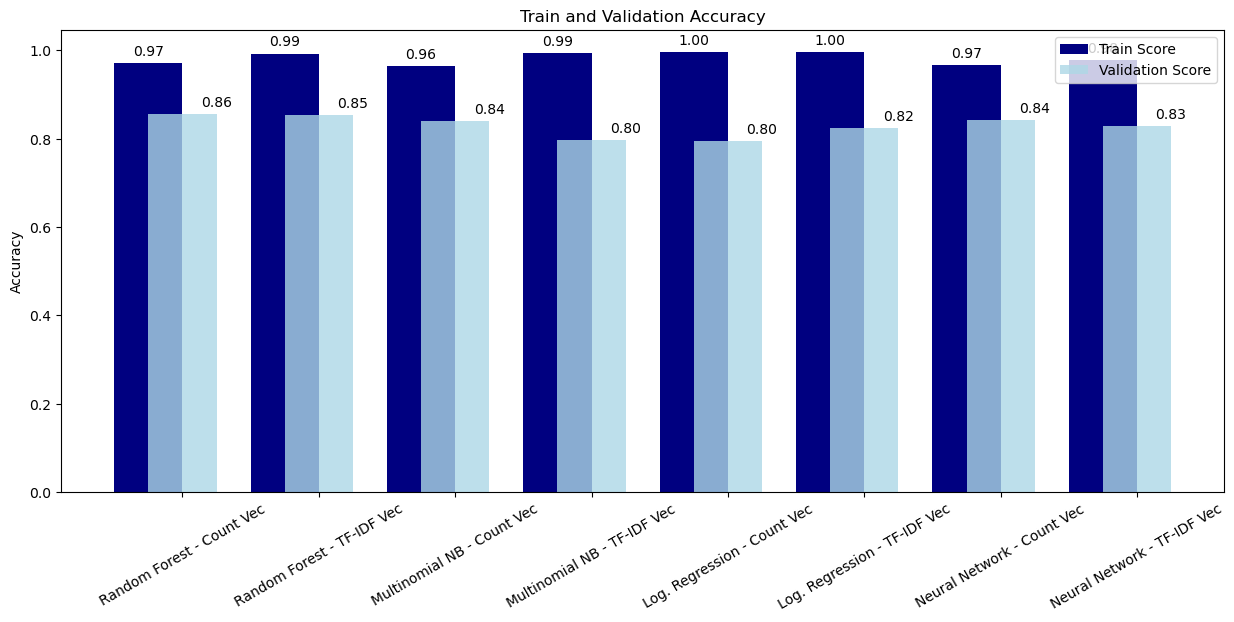

In [243]:
# Set the width of the bars and figure size
bar_width = 0.5
fig, ax = plt.subplots(figsize=(15, 6))

# Create a list of x coordinates for the bars
x = range(len(model_names))

# Plot the train scores with navy blue
train_bars = ax.bar(x, train_scores, bar_width, label='Train Score', color='navy')

# Plot the test scores with light blue
test_bars = ax.bar(x, test_scores, bar_width, label='Validation Score', color='lightblue', alpha=0.8, align='edge')

# Set the x-axis labels to be the model names and rotate them
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(model_names, rotation=30)

# Add labels above the bars
for i, (train_bar, test_bar) in enumerate(zip(train_bars, test_bars)):
    ax.text(i, train_bar.get_height() + 0.01, f'{train_scores[i]:.2f}', ha='center', va='bottom')
    ax.text(i + bar_width, test_bar.get_height() + 0.01, f'{test_scores[i]:.2f}', ha='center', va='bottom')

# Add a legend
ax.legend()

# Set labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Train and Validation Accuracy')

# Show the plot
plt.show()

### Best Model - Evaluate on Unseen Test Data

In [250]:
best_model = rf_count_best_model

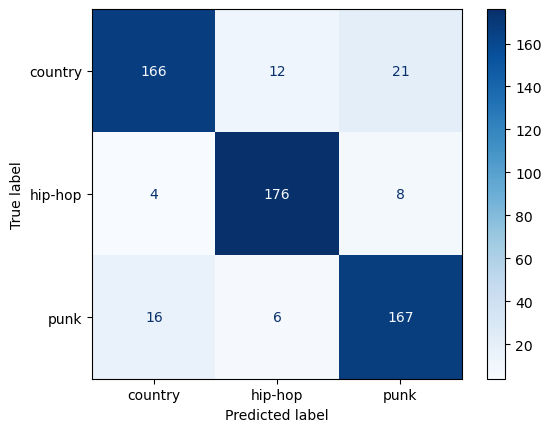

In [245]:
display = ConfusionMatrixDisplay.from_estimator(best_model, X_test_count, y_test, cmap='Blues')

In [246]:
best_model.score(X_test_count, y_test)

0.8836805555555556

In [247]:
y_pred = best_model.predict(X_test_count)

In [248]:
precision_score(y_test, y_pred, average='weighted')

0.8840183434970078

In [249]:
recall_score(y_test, y_pred, average='weighted')

0.8836805555555556

In [261]:
f1_score(y_test, y_pred, average='weighted')

0.8833410299706111

In [252]:
best_model_2 = rf_tfidf_best_model

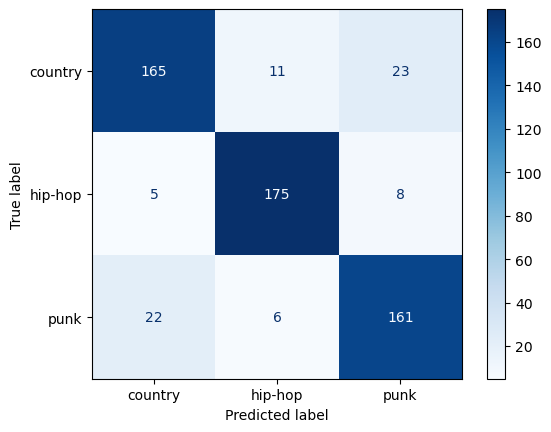

In [254]:
display = ConfusionMatrixDisplay.from_estimator(best_model_2, X_test_tfidf, y_test, cmap='Blues')

In [255]:
best_model_2.score(X_test_tfidf, y_test)

0.8697916666666666

In [256]:
y_pred_2 = best_model_2.predict(X_test_tfidf)

In [257]:
precision_score(y_test, y_pred_2, average='weighted')

0.8695384837962963

In [262]:
recall_score(y_test, y_pred_2, average='weighted')

0.8697916666666666

In [263]:
f1_score(y_test, y_pred_2, average='weighted')

0.8695210805482334